### Customizing Matplotlib: Configurations and Stylesheets

• Matplotlib’s default plot settings are often the subject of complaint among its users.

• While much is slated to change in the 2.0 Matplotlib release, the ability to customize default settings helps bring the package in line with your own aesthetic preferences.

• Here we’ll walk through some of Matplotlib’s runtime configuration ( rc ) options, and take a look at the newer stylesheets feature, which contains some nice sets of default configurations.

### Plot Customization by Hand

• Throughout this chapter, we’ve seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.

• It’s possible to do these customizations for each individual plot.

• For example, here is a fairly drab default histogram.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use("classic")

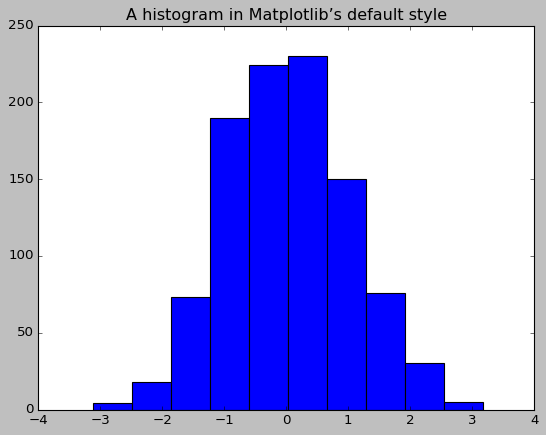

In [26]:
x = np.random.randn(1000)
plt.hist(x)
plt.title("A histogram in Matplotlib’s default style");

• We can adjust this by hand to make it a much more visually pleasing plot

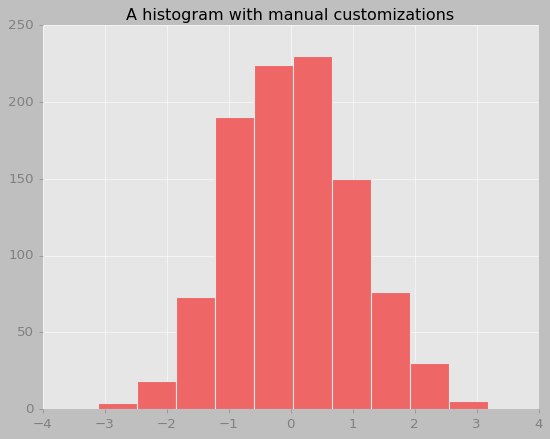

In [27]:
# Use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# Draw a solid white grid lines
plt.grid(color = 'w', linestyle = "solid")

# Hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Hide top & right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Lighten ticks & labels
ax.tick_params(colors = "gray", direction = "out")
for tick in ax.get_xticklabels():
    tick.set_color("gray")
for tick in ax.get_yticklabels():
    tick.set_color("gray")

# Control face & edge color of histogram
ax.hist(x, edgecolor = "#E6E6E6", color='#EE6666')
plt.title("A histogram with manual customizations");

• This looks better, and you may recognize the look as inspired by the look of the R
language’s ggplot visualization package.

• But this took a whole lot of effort! We definitely do not want to have to do all that tweaking each time we create a plot.

• Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

### Changing the Defaults: rcParams

• Each time Matplotlib loads, it defines a runtime configuration(rc) containing the default styles for every plot element you create.

• You can adjust this configuration at any time using the plt.rc convenience routine.

• Let’s see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

• We’ll start by saving a copy of the current rcParams dictionary, so we can easily reset these changes in the current session:

In [28]:
ipython_default = plt.rcParamsDefault.copy()

In [29]:
from matplotlib import cycler
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color = 'w', linestyle = 'solid')
plt.rc('xtick', direction = 'out', color = 'gray')
plt.rc('ytick', direction = 'out', color = 'gray')
plt.rc('patch', edgecolor = '#E6E6E6')
plt.rc('lines', linewidth = 2)

• With these settings defined, we can now create a plot and see our settings in action

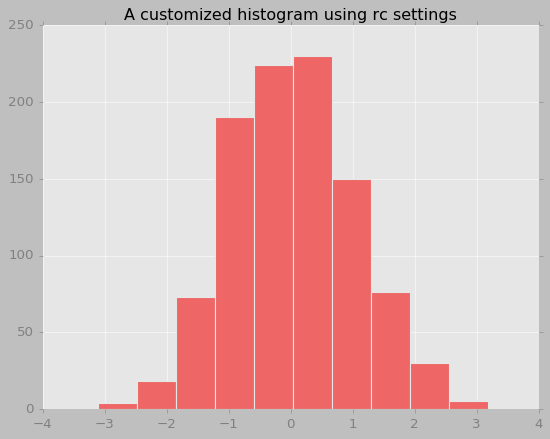

In [30]:
plt.title("A customized histogram using rc settings")
plt.hist(x);

• Let’s see what simple line plots look like with these rc parameters

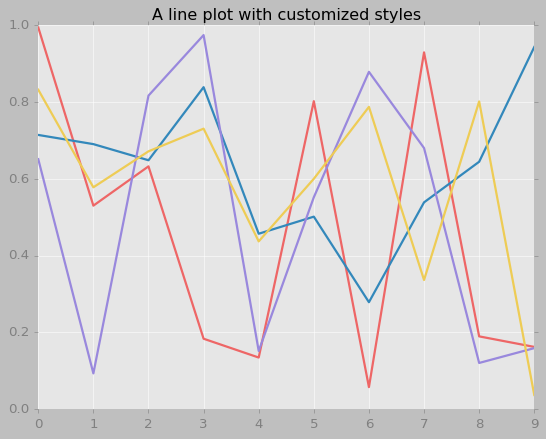

In [31]:
plt.title("A line plot with customized styles")
for i in range(4):
    plt.plot(np.random.rand(10))

### Stylesheets

• The version 1.4 release of Matplotlib in August 2014 added a very convenient style module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles.

• These stylesheets are formatted similarly to the .matplotlibrc files mentioned earlier, but must be named with a .mplstyle extension.

• Even if you don’t create your own style, the stylesheets included by default are extremely useful.

• The available styles are listed in plt.style.available.

• Here I’ll list only the first five for brevity:

In [32]:
plt.style.available[:5]

['seaborn-poster',
 'seaborn-dark',
 'Solarize_Light2',
 'seaborn-colorblind',
 'tableau-colorblind10']

• The basic way to switch to a stylesheet is to call:

In [33]:
plt.style.use("seaborn-dark")

• But keep in mind that this will change the style for the rest of the session!

• Alternatively, you can use the style context manager, which sets a style temporarily:

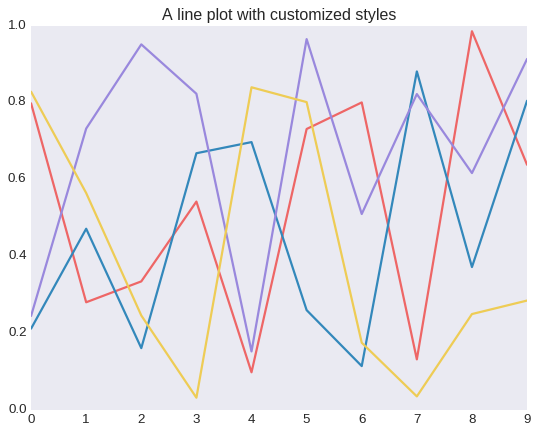

In [34]:
plt.title("A line plot with customized styles")
with plt.style.context("tableau-colorblind10"):
    for i in range(4):
        plt.plot(np.random.rand(10))

• Let’s create a function that will make two basic types of plot:

In [46]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
        ax[1].legend(['a', 'b', 'c'], loc='lower left')

• We’ll use this to explore how these plots look using the various built-in styles.

### Default style

• The default style is what we’ve been seeing so far throughout the book; we’ll start with that.

• First, let’s reset our runtime configuration to the notebook default:

In [44]:
mpl.rcParams.update(mpl.rcParamsDefault)

• Now let’s see how it looks

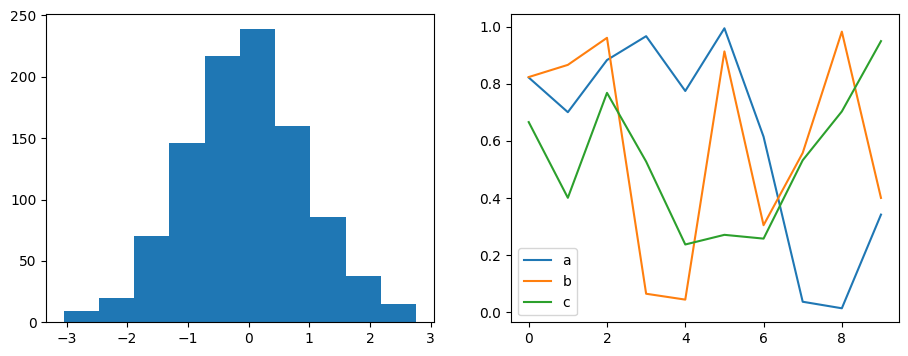

In [48]:
hist_and_lines()

### FiveThirtyEight style

• The FiveThirtyEight style mimics the graphics found on the popular FiveThirtyEight website.

• As you can see in Figure, it is typified by bold colors, thick lines, and transparent axes.

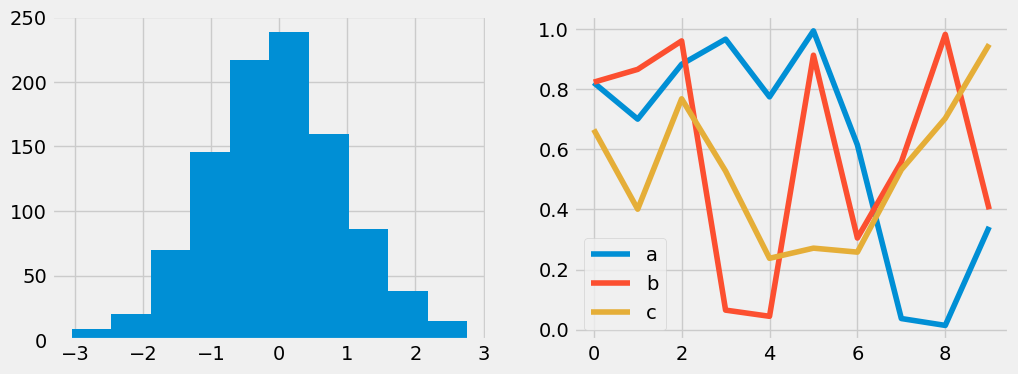

In [52]:
with plt.style.context("fivethirtyeight"):
    hist_and_lines()

### ggplot
• The ggplot package in the R language is a very popular visualization tool.

• Matplotlib’s ggplot style mimics the default styles from that package.

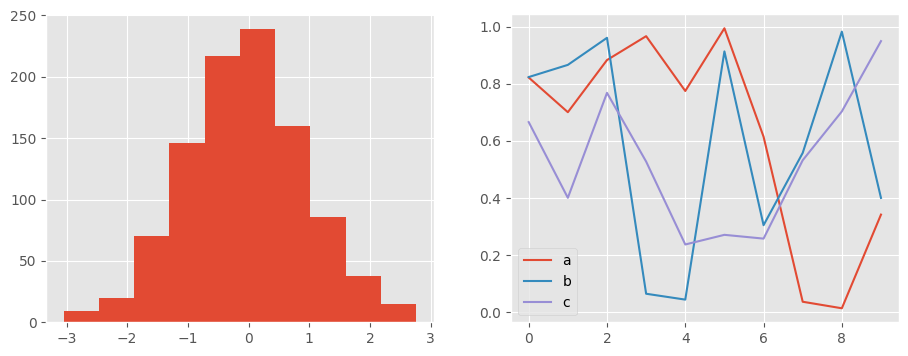

In [53]:
with plt.style.context("ggplot"):
    hist_and_lines()

### Bayesian Methods for Hackers style

• There is a very nice short online book called Probabilistic Programming and Bayesian Methods for Hackers;

• It features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually appealing style throughout the book.

• This style is reproduced in the bmh stylesheet.

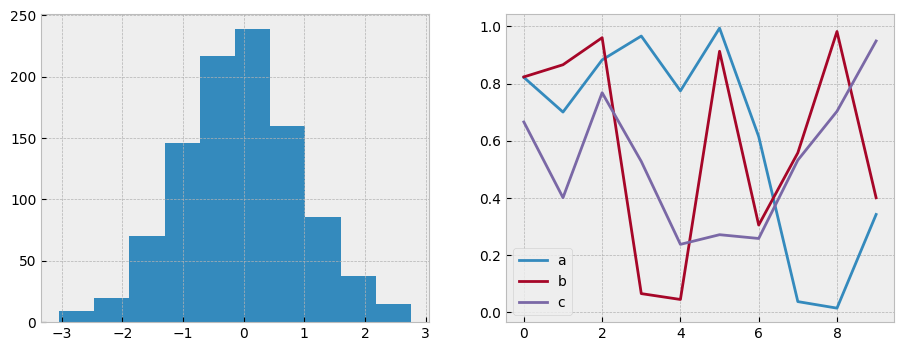

In [54]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

• For figures used within presentations, it is often useful to have a dark rather than light background.

• The dark_background style provides this

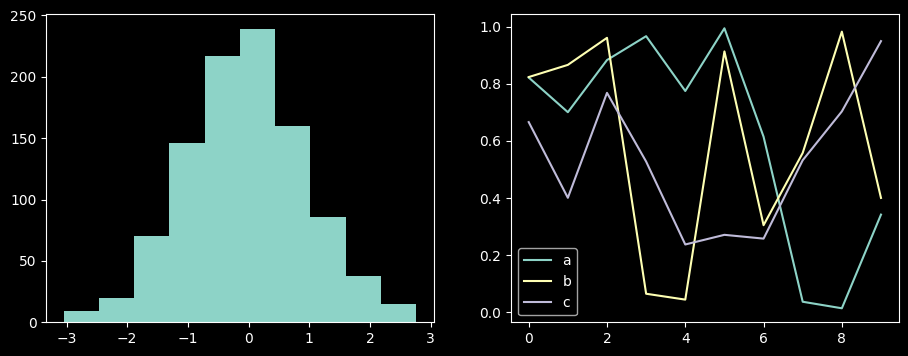

In [57]:
with plt.style.context("dark_background"):
    hist_and_lines()

### Grayscale

• Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.

• For this, the grayscale style, shown in Figure, can be very useful:

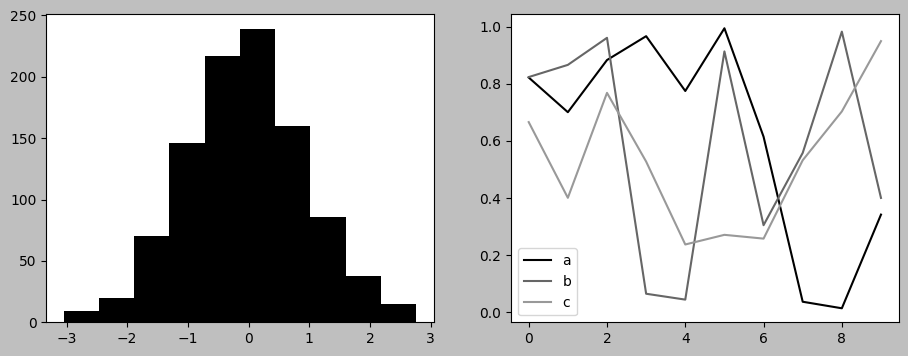

In [58]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

• Matplotlib also has stylesheets inspired by the Seaborn library.

• As we will see, these styles are loaded automatically when Seaborn is imported into a notebook.

• I’ve found these settings to be very nice, and tend to use them as defaults in my own data exploration.

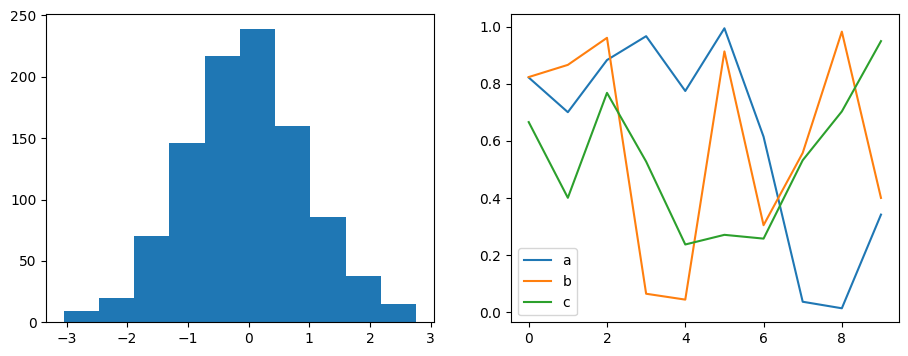

In [59]:
import seaborn
hist_and_lines()

• With all of these built-in options for various plot styles, Matplotlib becomes much more useful for both interactive visualization and creation of figures for publication.